## A notebook just to take an initial look at the data for IML assignment 2

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy
import astropy.units as u
import astropy.coordinates as coord

from sklearn.model_selection import train_test_split
import umap.umap_ as umap 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA

from sklearn import tree
from sklearn import ensemble

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

import time
import seaborn as sns

In [124]:
# def read_in_data(filename = 'data/A2_data.csv'):
#     '''reads in the data from the given csv, and saves it in a Pandas dataframe'''
#     df = pd.read_csv(filename)
    
#     return df

def resplit(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)#, random_state=92
    X_train,y_train=X_train.reset_index(drop=True),y_train.reset_index(drop=True)
    X_test,y_test=X_test.reset_index(drop=True),y_test.reset_index(drop=True)
    return (X_train, X_test, y_train, y_test)

def feature_importances_plot(forest, X_data, title = 'Feature Importances Using MDI', ymax = None):
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

    feature_names = X_data.columns
    forest_importances = pd.Series(importances, index=feature_names)

    x_locs = range(importances.size)

    fig = plt.figure()
    ax = fig.add_subplot(111)

    forest_importances.plot.bar(yerr=std, ax=ax, capsize = 3)
    
    ax.set_title(title)
    ax.set_ylabel('Mean Decrease in Impurity')
    ax.set_ylim(0,ymax)
    return

In [5]:
path = "data/"

data=pd.read_csv(path+'A2_data.csv')

X,y= data.loc[:, data.columns != 'class'], data['class']

#We know that a flux should be positive so remove the datapoint which does not have that
#This datapoint has value -9999 so not a detection but a instrumentation issue
I_remove=np.where(X['u']<0)[0]
X,y = X.drop(I_remove),y.drop(I_remove)
X,y=X.reset_index(drop=True),y.reset_index(drop=True)

corr_X = X.copy()
coor_y = y.copy()

print(f'There are {X.shape[0]} samples of each {X.shape[1]} features')

#Data includes some identifiers lets remove those 
ID_parameters= ['field_ID','MJD','plate','alpha','delta']#'field_ID','MJD','plate', 'alpha', 'delta'
for ID in ID_parameters:
    X=X.loc[:, X.columns != ID]

print(f'There are final {X.shape[0]} samples of now {X.shape[1]} features')

X_train, X_test, y_train, y_test = resplit(X,y)

print(f'There are {X_train.shape[0]} training samples of each {X_train.shape[1]} features')

There are 99999 samples of each 11 features
There are final 99999 samples of now 6 features
There are 66999 training samples of each 6 features


In [ ]:
# plt.scatter(data['alpha'][data['class']=='GALAXY'], data['delta'][data['class']=='GALAXY'], s = 5)
# plt.scatter(data['alpha'][data['class']=='QSO'], data['delta'][data['class']=='QSO'], s = 5)
# plt.scatter(data['alpha'][data['class']=='STAR'], data['delta'][data['class']=='STAR'], s = 5)

In [ ]:
ra = coord.Angle(data['alpha']*u.degree)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(data['delta']*u.degree)

new_df_arr = np.array([ra,dec,data['class']])
plot_df = pd.DataFrame(np.transpose(new_df_arr), columns = ['ra','dec','class'])

In [ ]:
# fig = plt.figure(figsize=(8,6))
# ax = fig.add_subplot(projection="mollweide")

# for cls in ['GALAXY', 'QSO', 'STAR']:
#     ra_sub = plot_df.loc[plot_df['class'] == cls, 'ra']*u.degree.to(u.rad)
#     dec_sub = plot_df.loc[plot_df['class'] == cls, 'dec']*u.degree.to(u.rad)
    
#     ax.scatter(ra_sub, dec_sub, s = 5, label = cls)
#     ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
#     ax.grid(True)

In [ ]:
fig = plt.figure(figsize=(8,12))
colors = ['red', 'green', 'blue']

for idx, cls in enumerate(['GALAXY', 'QSO', 'STAR']):
    loc = 311+idx
    ax = fig.add_subplot(loc, projection="mollweide")
    ra_sub = plot_df.loc[plot_df['class'] == cls, 'ra']*u.degree.to(u.rad)
    dec_sub = plot_df.loc[plot_df['class'] == cls, 'dec']*u.degree.to(u.rad)
    
    ax.scatter(ra_sub, dec_sub, s = 5, c=colors[idx])
    ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
    ax.grid(True)
    ax.set_title(cls)
    
plt.tight_layout()    
#plt.savefig('./figures/skymaps.pdf', dpi=300, bbox_inches = 'tight')

### CMDs

In [ ]:
# fig = plt.figure(figsize=(6,6))

# colors = ['red', 'green', 'blue']

# for idx, cls in enumerate(['GALAXY', 'QSO', 'STAR']):
#     loc = 221+idx
#     ax = fig.add_subplot(loc)
#     ra_sub = plot_df.loc[plot_df['class'] == cls, 'ra']*u.degree.to(u.rad)
#     dec_sub = plot_df.loc[plot_df['class'] == cls, 'dec']*u.degree.to(u.rad)
    
#     color = data.loc[data['class'] == cls, 'g'] - data.loc[data['class'] == cls, 'r']
#     mag = data.loc[data['class'] == cls, 'g']
#     ax.scatter(color, mag, s = 5, c=colors[idx])
    
#     ax.set_xlim(-12,12)
#     ax.set_ylim(10,35)
#     ax.set_title(cls)
#     ax.set_xlabel('g-r')
#     ax.set_ylabel('g')
    
#     plt.gca().invert_yaxis()

### Correlation Plot

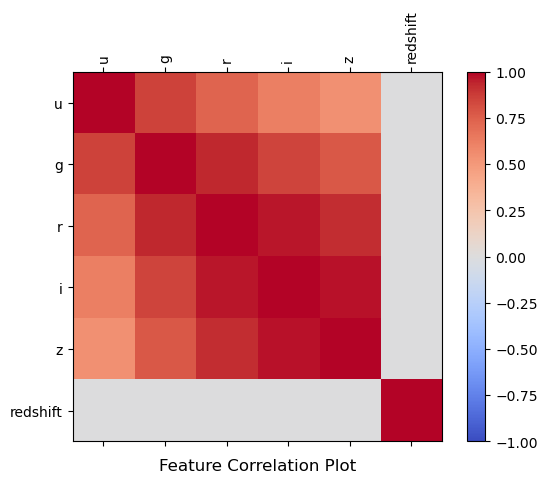

In [6]:
corr = X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
ax.set_title('Feature Correlation Plot', y = -0.1)
plt.savefig('./figures/correlationplot.pdf', dpi=300, bbox_inches = 'tight')

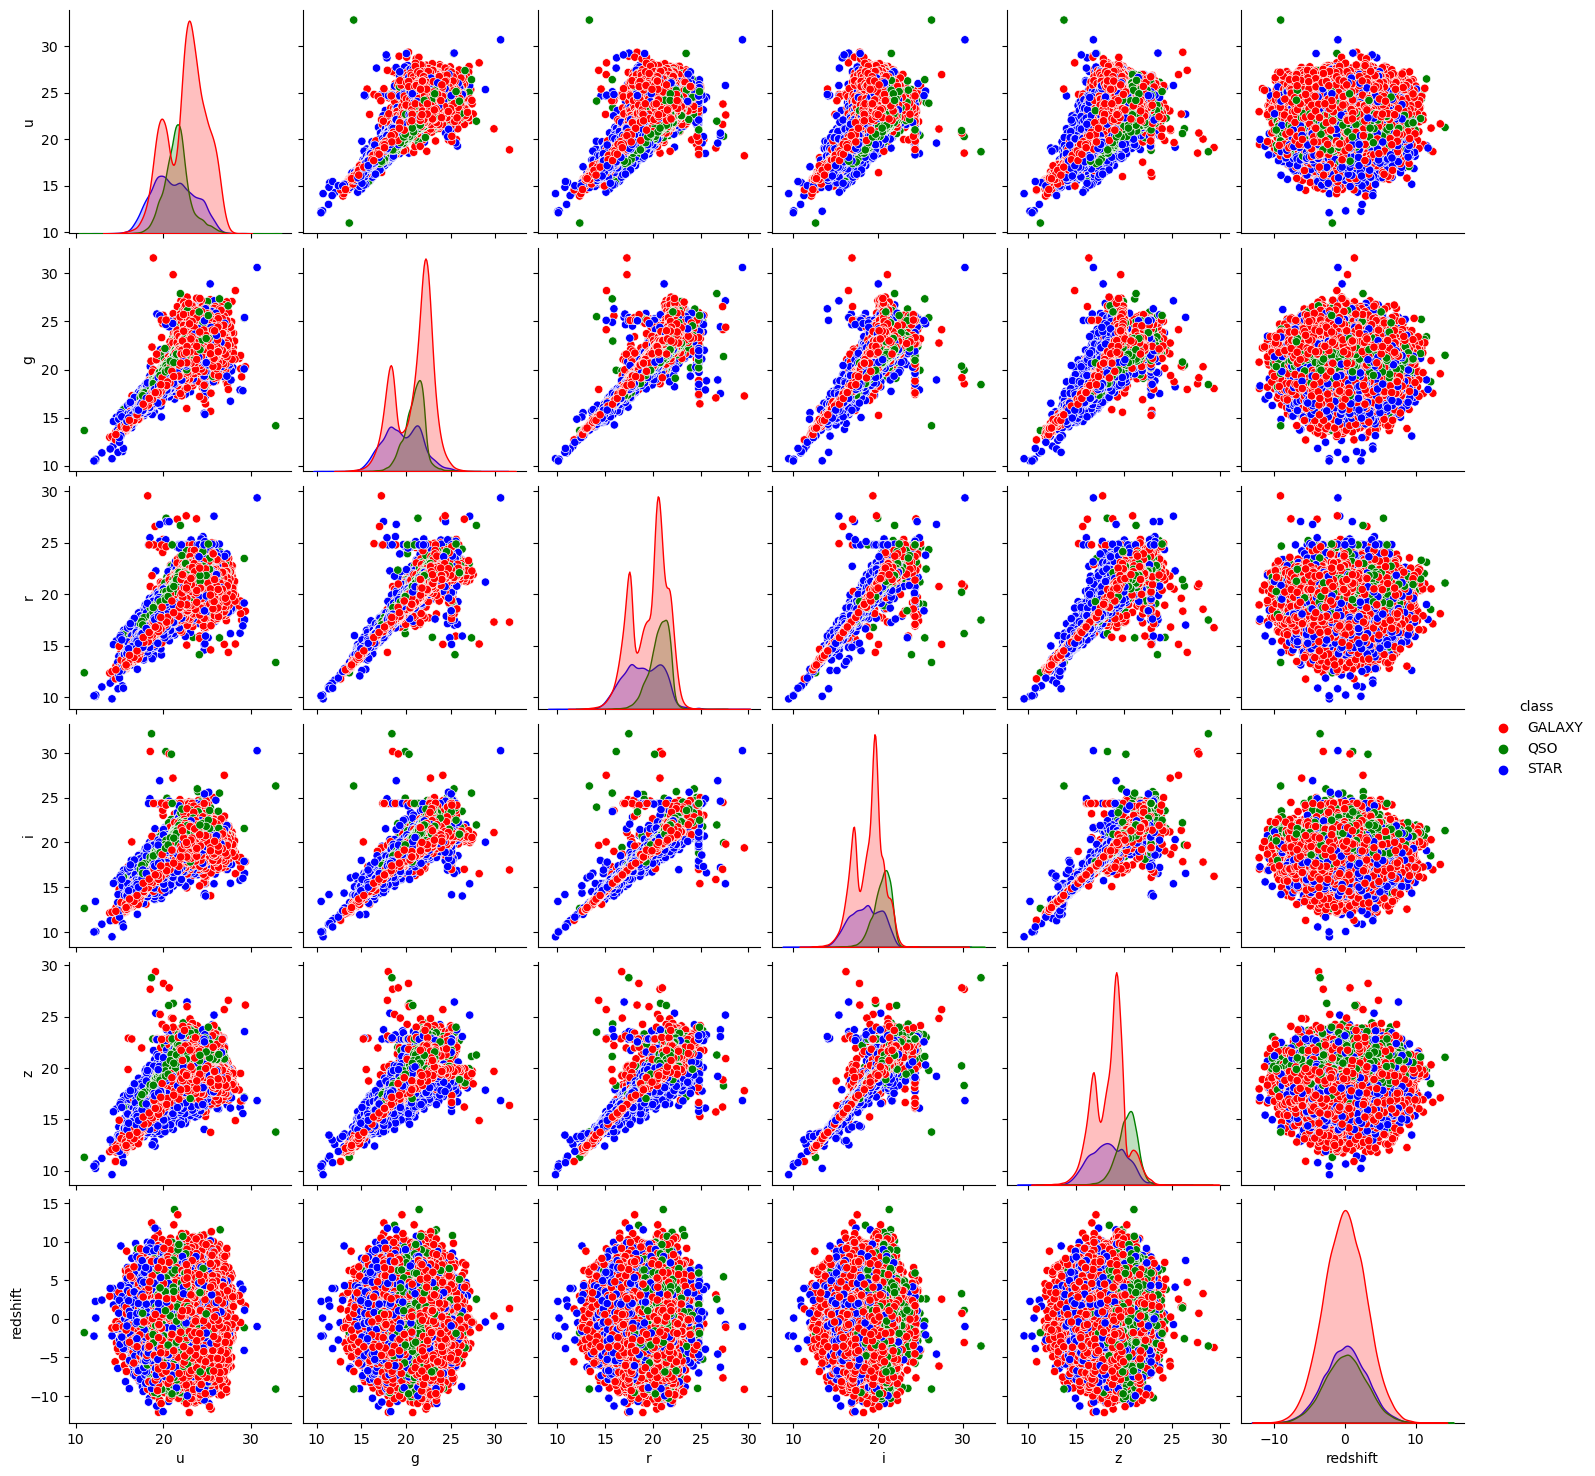

In [87]:
pairplot_data = X.copy()
pairplot_data['class'] = y
color_pallete = {
    'GALAXY' : 'red',
    'QSO' : 'green',
    'STAR' : 'blue'
    
}

sns.pairplot(pairplot_data, hue = 'class', palette = color_pallete)
#plt.savefig('./figures/pairplot.pdf', dpi=300, bbox_inches = 'tight')

### Decision Tree Classifier

In [ ]:
# X_train, X_test, y_train, y_test = resplit(X,y)

# # X_train_temp,X_test_temp= X_train[cols], X_test[cols]

In [ ]:
# tree_clf = tree.DecisionTreeClassifier()
# tree_clf = clf.fit(X_train, y_train)

In [ ]:
# tree_clf.score(X_test, y_test)

In [ ]:
# tree.plot_tree(clf, max_depth = 0);

### Random Forest Ensemble:

In [ ]:
# rf_ens = ensemble.RandomForestClassifier(n_estimators = 10, max_depth = 10)

In [ ]:
# rf_ens.fit(X_train, y_train)

In [ ]:
# ens.score(X_test, y_test)

In [ ]:
# feature_importances_plot(ens)

## Cross-Validation on random tree

In [8]:
X_train, X_test, y_train, y_test = resplit(X,y)

In [9]:
tree_clf = tree.DecisionTreeClassifier()
# tree_clf.fit(X_train, y_train)
# tree_clf.score(X_test, y_test)

In [10]:
cv_output = cross_validate(tree_clf, X_train, y_train, cv=5, return_train_score=True)

In [11]:
print("Simple cross-validation yields average %0.5f accuracy +/- %0.5f" % (cv_output['test_score'].mean(), cv_output['test_score'].std()))


Simple cross-validation yields average 0.80737 accuracy +/- 0.00253


In [137]:
maxdepth = np.arange(1, 21, 1)
#maxdepth[0]+=1

valmeans = []
valstds = []

trameans = []
trastds = []

for idx, depth in enumerate(maxdepth):
    clf_tree = tree.DecisionTreeClassifier(max_depth = depth)
    cv_output = cross_validate(clf_tree, X_train, y_train, cv=5, return_train_score=True)
    
    trameans.append(cv_output['train_score'].mean())
    trastds.append(cv_output['train_score'].std())   
    
    valmeans.append(cv_output['test_score'].mean())
    valstds.append(cv_output['test_score'].std()) 

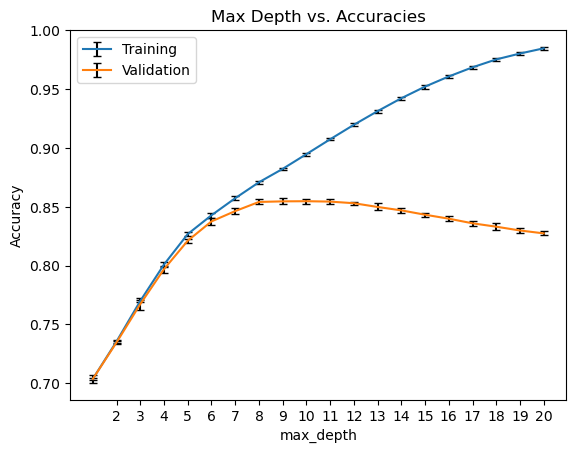

In [192]:
plt.errorbar(maxdepth, trameans, yerr=trastds, ecolor = 'black', capsize = 3, label = 'Training')
plt.errorbar(maxdepth, valmeans, yerr=valstds, ecolor = 'black', capsize = 3, label = 'Validation')
plt.xticks(maxdepth[1:])
plt.title('Max Depth vs. Accuracies')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend();

#plt.savefig('./figures/trainvsvalidation.pdf', dpi=300, bbox_inches = 'tight')


In [193]:
# fig = plt.figure(figsize=(14,8))

# xlabels = ['1st', '2nd', '3rd', '4th', '5th']
# x_axis_locs = np.arange(len(xlabels))
# maxdepth = [4, 10, 20, None]

# for idx, depth in enumerate(maxdepth):
#     clf_tree = tree.DecisionTreeClassifier(max_depth = depth)
#     cv_output = cross_validate(clf_tree, X_train, y_train, cv=5, return_train_score=True)
    
# #     clf_tree.fit(X_train,y_train)
# #     test_score = clf_tree.score(X_test, y_test)
#     print('max_depth = '+ str(depth)+' mean training score: %0.4f +/- %0.4f' % (cv_output['train_score'].mean(), cv_output['train_score'].std()))
#     print('max_depth = '+ str(depth)+' mean validation score: %0.4f +/- %0.4f' % (cv_output['test_score'].mean(), cv_output['test_score'].std()))
    
#     loc = 221+idx
#     ax = fig.add_subplot(loc)
    
#     ax.bar(x_axis_locs-.26, cv_output['train_score'], width=.25, label = 'Training Score')
#     ax.bar(x_axis_locs, cv_output['test_score'], width=.25, label = 'Validation Score')
# #     ax.bar(x_axis_locs+.26, test_score, width=.25, color='green', label = 'Test Score')

#     ax.set_xticks(x_axis_locs, xlabels)
#     ax.set_xlabel('Fold Number', fontsize=14)
#     ax.set_ylabel('Accuracy', fontsize=14)
#     ax.set_title('max_depth = ' + str(depth))
#     ax.set_ylim(0,1.05)
#     ax.legend()
    
# plt.suptitle('Training vs. Validation')
# plt.tight_layout()

# #plt.savefig('./figures/trainvsvalidation.pdf', dpi=300, bbox_inches = 'tight')


# Hyper-parameter Tuning via Cross-Validation

In [194]:
red_data=pd.read_csv(path+'PCA_reduced_5.csv') #read in data

red_X,red_y= red_data.loc[:, red_data.columns != 'class'], red_data['class']

In [195]:
#create training/test data for GSCV
print(f'There are total {red_X.shape[0]} samples of {red_X.shape[1]} features')

X_train, X_test, y_train, y_test = resplit(red_X,red_y)

print(f'There are {X_train.shape[0]} training samples of each {X_train.shape[1]} features')

There are total 66999 samples of 5 features
There are 44889 training samples of each 5 features


### Data visualization

Text(0.5, -0.1, 'Feature Correlation Plot')

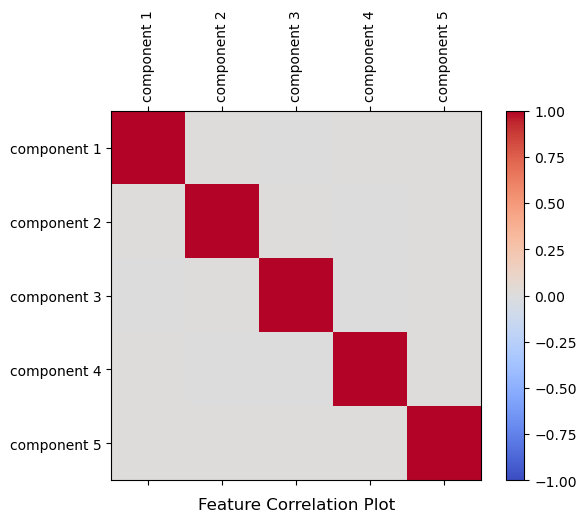

In [196]:
#create correlation plot of data (if data is PCA reduced, the plot should show no correlation)

corr = red_X.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(red_X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(red_X.columns)
ax.set_yticklabels(red_X.columns)
ax.set_title('Feature Correlation Plot', y = -0.1)
#plt.savefig('./figures/reducedcorrelationplot.pdf', dpi=300, bbox_inches = 'tight')

In [15]:
#creates a neat little pairplot of the data, useful for visualization, though takes a bit to run
pairplot_data = red_data
pairplot_data['class'] = y
color_pallete = {
    'GALAXY' : 'red',
    'QSO' : 'green',
    'STAR' : 'blue'
    
}

sns.pairplot(pairplot_data, hue = 'class', palette = color_pallete)
#plt.savefig('./figures/reducedpairplot.pdf', dpi=300, bbox_inches = 'tight')

## Conduct GSCV

In [331]:
n_features = 5 #number of features in the reduced data set

params = { #dictionary of possible parameters
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [6,7,8,9,10],
    'max_features': np.linspace(1,n_features,3).astype(int).tolist(), #for a 5-feature dataset, this gives [1,3,5]
    'max_samples': [.25,.5,.75,1.],
    'n_estimators': [150]
}

forest_clf = GridSearchCV(estimator=ensemble.RandomForestClassifier(), param_grid=params, cv=5, n_jobs=5, verbose=1, 
                   return_train_score = True) #create gridsearchcv

forest_clf.fit(X_train, y_train)
forest_clf.best_params_ #output "best" parameters

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 3,
 'max_samples': 0.5,
 'n_estimators': 150}

In [332]:
#pull out important info.
params_df = pd.DataFrame(forest_clf.cv_results_['params'])
validation_df = pd.DataFrame(forest_clf.cv_results_['mean_test_score'], columns=['Validation'])
training_df = pd.DataFrame(forest_clf.cv_results_['mean_train_score'], columns=['Training'])

#put into single dataframe
gscv_output = pd.concat([params_df,validation_df,training_df],axis=1)
#calculate percent difference
gscv_output['Percent Difference'] = (gscv_output['Training'] - gscv_output['Validation'])/gscv_output['Training']

In [333]:
#save output dataframe, if wanted
#gscv_output.to_csv('data/reducedcrosscor_out.csv')

### Select Parameter Set

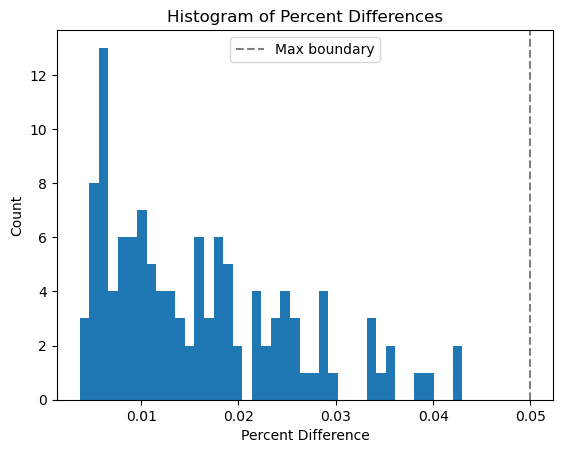

In [334]:
#bounds on the reduced hypothesis space
minsearch = 0
maxsearch = .05

#create histogram of percent differences
plt.hist(gscv_output['Percent Difference'], bins = 40);
#plt.axvline(minsearch, c='grey', linestyle = 'dashed')
plt.axvline(maxsearch, c='grey', linestyle = 'dashed', label = 'Max boundary')
plt.title('Histogram of Percent Differences')
plt.xlabel('Percent Difference')
plt.ylabel('Count')
plt.legend()

# plt.savefig('./figures/meanDiffHist.pdf', dpi=300, bbox_inches = 'tight')

In [335]:
#choose best parameters from this space
selected_best = gscv_output.loc[(gscv_output['Percent Difference'] > minsearch) & (gscv_output['Percent Difference'] < maxsearch)].iloc[[gscv_output.loc[(gscv_output['Percent Difference'] > minsearch) & (gscv_output['Percent Difference'] < maxsearch), 'Validation'].argmax()]]
selected_idx = selected_best.index.item() #index needed for later visualization

#grab the "best" parameters from gscv, in case wanted for comparison
gscv_best = gscv_output.loc[(gscv_output['criterion'] == forest_clf.best_params_['criterion']) & (gscv_output['max_depth'] == forest_clf.best_params_['max_depth']) & (gscv_output['max_features'] == forest_clf.best_params_['max_features']) & (gscv_output['max_samples'] == forest_clf.best_params_['max_samples'])]
gscv_idx = gscv_best.index.item()#index needed for later visualization


In [346]:
#create dictionary of selected parameters
selected_params = {'criterion': selected_best['criterion'].item(),
                   'max_depth': int(selected_best['max_depth'].item()),
                   'max_features': selected_best['max_features'].item(), 
                   'max_samples' : selected_best['max_samples'].item(),
                   'n_estimators': selected_best['n_estimators'].item()}

#create random forest
selected = ensemble.RandomForestClassifier(**selected_params)

selected_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 3,
 'max_samples': 0.5,
 'n_estimators': 150}

In [337]:
#grab GSCV "best" params
gscv_params = forest_clf.best_params_
gscv = ensemble.RandomForestClassifier(**gscv_params)

gscv_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 3,
 'max_samples': 0.5,
 'n_estimators': 150}

## Analysis

In [338]:
showGSCV = False 
#Toggles whether plots are made showing the outputs from the GSCV's selected "best" parameter set, given
#that the "best" set is different from the one selected in our reduced hypothesis space

gscv_params == selected_params

True

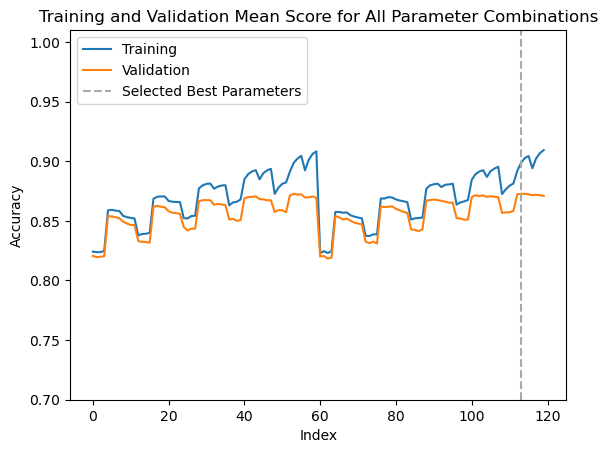

In [339]:
#plot the training and validation scores by index for all 120 options

plt.plot(np.arange(len(gscv_output['Training'])), gscv_output['Training'], label = 'Training')
plt.plot(np.arange(len(gscv_output['Validation'])), gscv_output['Validation'], label = 'Validation')
#plt.plot(np.arange(len(gscv_output['Percent Difference'])), gscv_output['Percent Difference'], label = 'Percent Difference')

plt.axvline(selected_idx, c='darkgrey', linestyle = 'dashed', label = 'Selected Best Parameters')
if gscv_params != selected_params and showGSCV:
    plt.axvline(gscv_idx, c='grey', linestyle = 'dotted', label = 'GSCV Parameters')

plt.title('Training and Validation Mean Score for All Parameter Combinations')
plt.xlabel('Index')
plt.ylabel('Accuracy')
plt.ylim(.7,1.01)
plt.legend();

#plt.savefig('./figures/scoresLinePlot.pdf', dpi=300, bbox_inches = 'tight')


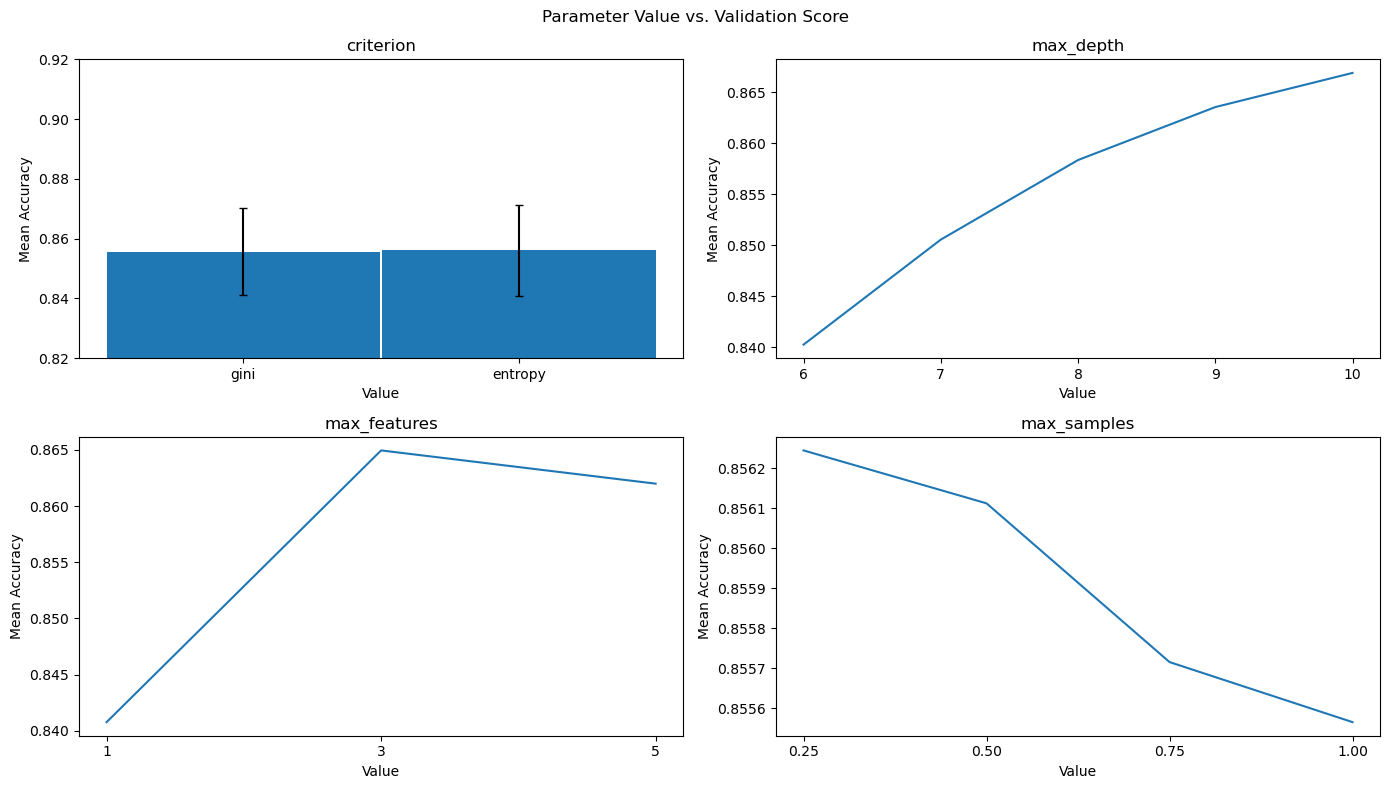

In [357]:
fig = plt.figure(figsize=(14,8))

xlabels = ['gini','entropy']
x_axis_locs = np.arange(len(xlabels))
parameterlist = ['criterion', 'max_depth', 'max_features', 'max_samples']

for idx, param in enumerate(parameterlist):
    loc = 221+idx
    ax = fig.add_subplot(loc)
    
    tra_means = []
    tra_stds = []
    val_means = []
    val_stds = []
    for value in gscv_output[param].unique():
        tra_means.append(gscv_output[gscv_output[param] == value]['Training'].mean())
        tra_stds.append(gscv_output[gscv_output[param] == value]['Training'].std())
        val_means.append(gscv_output[gscv_output[param] == value]['Validation'].mean())
        val_stds.append(gscv_output[gscv_output[param] == value]['Validation'].std())
    
    if idx == 0:
        #ax.bar(x_axis_locs-.24, tra_means, width=.47, label = 'Training Score', yerr = tra_stds, capsize = 3)
        ax.bar(x_axis_locs, val_means, width=.99, label = 'Validation Score', yerr = val_stds, capsize = 3)
        ax.set_xticks(x_axis_locs, xlabels)
        ax.set_ylim(0.82,0.92)
    
    else:
        #ax.errorbar(gscv_output[param].unique(), tra_means, label = 'Training Score')#, yerr = tra_stds, capsize = 3,ecolor='black')
        ax.errorbar(gscv_output[param].unique(), val_means, label = 'Validation Score')#, yerr = val_stds, capsize = 3,ecolor='black')
        ax.set_xticks(gscv_output[param].unique())
        #ax.set_ylim(0.82,0.92)
        
    ax.set_xlabel('Value')
    ax.set_ylabel('Mean Accuracy')
    ax.set_title(param)
    #ax.legend()
    
plt.suptitle('Parameter Value vs. Validation Score')
plt.tight_layout()

#plt.savefig('./figures/GSCVout.pdf', dpi=300, bbox_inches = 'tight')



### Check for Over-Fitting:

In [241]:
#calculate simple cross validations
#gscv_cv = cross_validate(gscv, X_train, y_train, cv=5, return_train_score=True)
selected_cv = cross_validate(selected, X_train, y_train, cv=5, return_train_score=True)

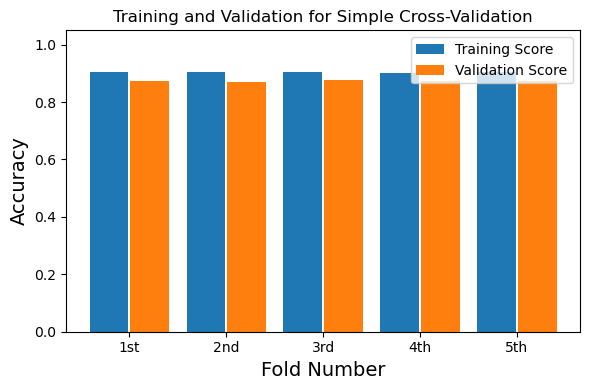

In [247]:
if gscv_params != selected_params and showGSCV:
    fig = plt.figure(figsize=(12,4))
else:
    fig = plt.figure(figsize=(6,4))

xlabels = ['1st', '2nd', '3rd', '4th', '5th']
x_axis_locs = np.arange(len(xlabels))

if gscv_params != selected_params and showGSCV:
    ax1 = fig.add_subplot(121)
else:
    ax1 = fig.add_subplot(111)


ax1.bar(x_axis_locs-.21, selected_cv['train_score'], width=.4, label = 'Training Score')
ax1.bar(x_axis_locs+.21, selected_cv['test_score'], width=.4, label = 'Validation Score')

ax1.set_xticks(x_axis_locs, xlabels)
ax1.set_xlabel('Fold Number', fontsize=14)
ax1.set_ylabel('Accuracy', fontsize=14)
if gscv_params != selected_params and showGSCV:
    ax1.set_title('Selected Best Parameters')
else:
    ax1.set_title('Training and Validation for Simple Cross-Validation')
ax1.set_ylim(0,1.05)
ax1.legend()

if gscv_params != selected_params and showGSCV:
    ax2 = fig.add_subplot(122)
    ax2.bar(x_axis_locs-.21, gscv_cv['train_score'], width=.4, label = 'Training Score')
    ax2.bar(x_axis_locs+.21, gscv_cv['test_score'], width=.4, label = 'Validation Score')
    
    ax2.set_xticks(x_axis_locs, xlabels)
    ax2.set_xlabel('Fold Number', fontsize=14)
    ax2.set_ylabel('Accuracy', fontsize=14)
    ax2.set_title('Grid Search CV Best Parameters')
    ax2.set_ylim(0,1.05)
    ax2.legend()


if gscv_params != selected_params and showGSCV:
    plt.suptitle('Training and Validation for Simple CV')
plt.tight_layout()

#plt.savefig('./figures/SelectedBarChart.pdf', dpi=300, bbox_inches = 'tight')

### Feature Importances plots

In [181]:
selected.fit(red_X,red_y)
if gscv_params != selected_params and showGSCV:
    gscv.fit(red_X,red_y)

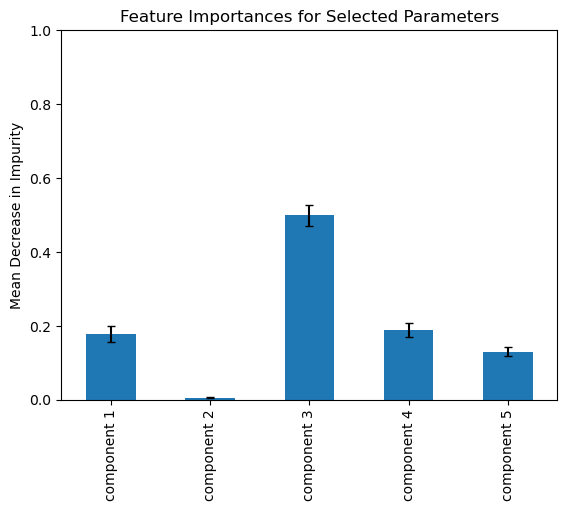

In [182]:
feature_importances_plot(selected, red_X, title = 'Feature Importances for Selected Parameters', ymax = 1)
# plt.savefig('./figures/FI_selected.png', dpi=300, bbox_inches = 'tight')


In [183]:
if gscv_params != selected_params and showGSCV:
    feature_importances_plot(gscv, red_X, title = 'Feature Importances for GSCV Parameters',ymax = 1)
#     plt.savefig('./figures/FI_gscv.png', dpi=300, bbox_inches = 'tight')

### Averages

In [353]:
#removing n_estimators from dictionary so we can make a single tree with the same other parameters
tree_params = selected_params.copy()
del tree_params["n_estimators"]
del tree_params["max_samples"]
tree_params

clf_tree = tree.DecisionTreeClassifier(**tree_params)

In [354]:
n_runs = 5

selected_values = []
tree_values = []
if gscv_params != selected_params and showGSCV:
    gscv_values = []
    
for i in range(n_runs):
    X_train_avg, X_test_avg, y_train_avg, y_test_avg = resplit(red_X,red_y)
#     print('split')
    selected.fit(X_train_avg, y_train_avg)
#     print('selected trained')
#     print('gscv trained')
    tree_clf.fit(X_train_avg, y_train_avg)
#     print('tree trained')

    
    if gscv_params != selected_params and showGSCV:
        gscv.fit(X_train_avg, y_train_avg)
        gscv_values.append(gscv.score(X_test_avg, y_test_avg))
    
    selected_values.append(selected.score(X_test_avg, y_test_avg))
    tree_values.append(tree_clf.score(X_test_avg, y_test_avg))
    
    print('Run '+str(i+1)+' complete')


Run 1 complete
Run 2 complete
Run 3 complete
Run 4 complete
Run 5 complete


In [355]:
selected_values = np.asarray(selected_values)
if gscv_params != selected_params and showGSCV:
    gscv_values = np.asarray(gscv_values)
tree_values = np.asarray(tree_values)

print("Selected Params: %0.5f accuracy +/- %0.5f over %d runs" % (selected_values.mean(), selected_values.std(), n_runs))
if gscv_params != selected_params and showGSCV:
    print("GSCV Params: %0.5f accuracy +/- %0.5f over %d runs" % (gscv_values.mean(), gscv_values.std(), n_runs))
print("Single Tree Params: %0.5f accuracy +/- %0.5f over %d runs" % (tree_values.mean(), tree_values.std(), n_runs))



Selected Params: 0.87104 accuracy +/- 0.00103 over 5 runs
Single Tree Params: 0.81573 accuracy +/- 0.00221 over 5 runs


Text(0.5, 1.0, 'Mean Test Accuracy Over 5 Runs')

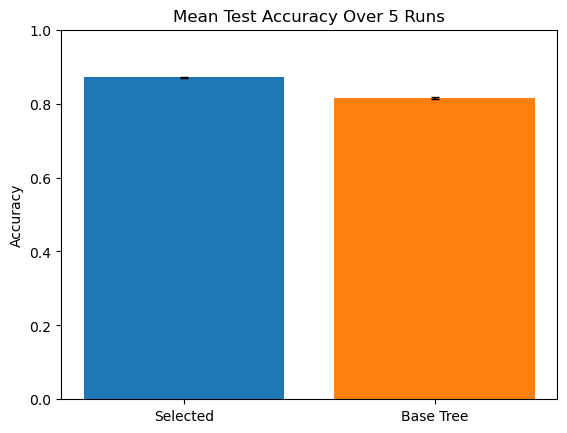

In [246]:
plt.bar([0],[selected_values.mean()], yerr = [selected_values.std()],capsize = 3)
if gscv_params != selected_params and showGSCV:
    plt.bar([1],[gscv_values.mean()], yerr = [gscv_values.std()],capsize = 3)
    plt.bar([2],[tree_values.mean()], yerr = [tree_values.std()],capsize = 3)
else:
    plt.bar([1],[tree_values.mean()], yerr = [tree_values.std()],capsize = 3)

xlabels = ['Selected', 'Base Tree']
if gscv_params != selected_params and showGSCV:
    xlabels = ['Selected', 'GSCV', 'Base Tree']

x_axis_locs = np.arange(len(xlabels))
plt.xticks(x_axis_locs, xlabels)

plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.title('Mean Test Accuracy Over %d Runs' % (n_runs))
#plt.legend();

# plt.savefig('./figures/means.pdf', dpi=300, bbox_inches = 'tight')